In [176]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../..")
from book.Roughgarden.sorting import merge_sort
import timeit
import functools

In [177]:
number_of_lists = 30
number_of_elements = np.linspace(1, 300, number_of_lists, dtype=int)
number_of_elements

array([  1,  11,  21,  31,  42,  52,  62,  73,  83,  93, 104, 114, 124,
       135, 145, 155, 165, 176, 186, 196, 207, 217, 227, 238, 248, 258,
       269, 279, 289, 300])

In [178]:
def fake_linear_function(array):
    for element in array:
        element + 1

def fake_quadratic_function(array):
    for element in array:
        for element in array:
            element + 1

lists_to_sort = [np.random.randn(n)*10 for n in number_of_elements]
measurements = 10

merge_sort_timings = []
linear_function_timings = []
quadratic_function_timings = []

for unsorted_list in lists_to_sort:
    t1 = timeit.Timer(functools.partial(merge_sort, unsorted_list))
    merge_sort_timings.append(t1.timeit(measurements))
    
    t2 = timeit.Timer(functools.partial(fake_linear_function, unsorted_list))
    linear_function_timings.append(t2.timeit(measurements))

    t3 = timeit.Timer(functools.partial(fake_quadratic_function, unsorted_list))
    quadratic_function_timings.append(t3.timeit(measurements))

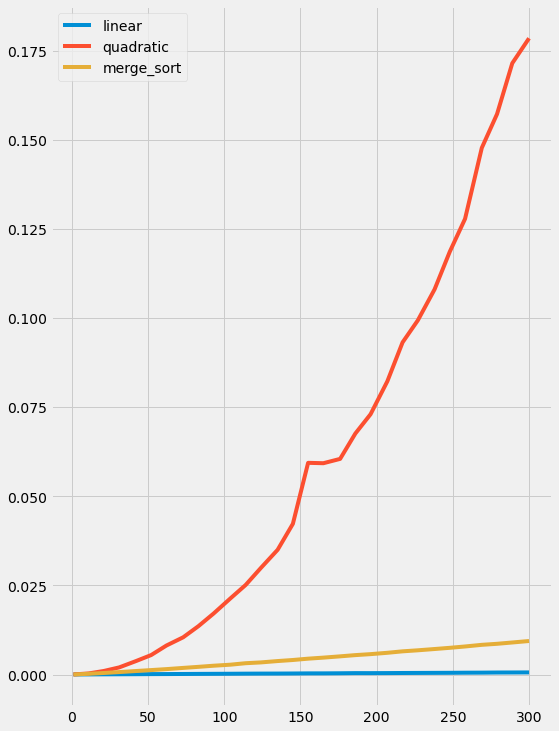

In [179]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8,12))
ax.plot(number_of_elements, linear_function_timings, label="linear")
ax.plot(number_of_elements, quadratic_function_timings, label="quadratic")
ax.plot(number_of_elements, merge_sort_timings, label="merge_sort")
ax.legend()